In [22]:
# open the generated synthetic data file and read it as a python dictionary called data

import json

file = open('synthetic_dataset_with_time.txt', 'r')
text = file.read()
data = json.loads(text)


In [23]:
import emip_toolkit as EMTK

# find areas of interest (AOIs) once again
image_path = "./"
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")


# add tokens to AOIs 
file_path = "./"
aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()


import correction

# find the y coordinate of each line in the text
line_ys = correction.find_lines_Y(aoi)

/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colb

In [24]:
import numpy as np
import drift_algorithms as algo
from tqdm import tqdm

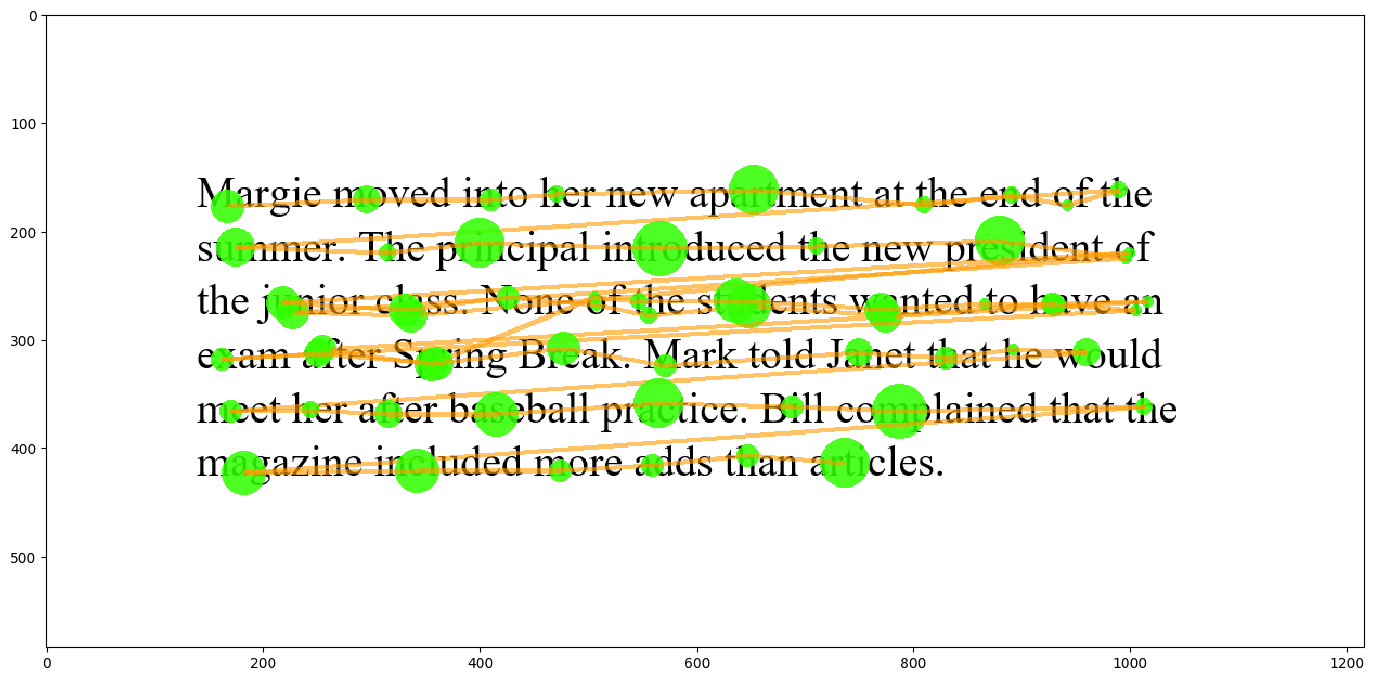

In [25]:
# draw original correct fixations

correction.draw_fixation('synthetic_text.png', data['robot1'].copy())

/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colb

111
111


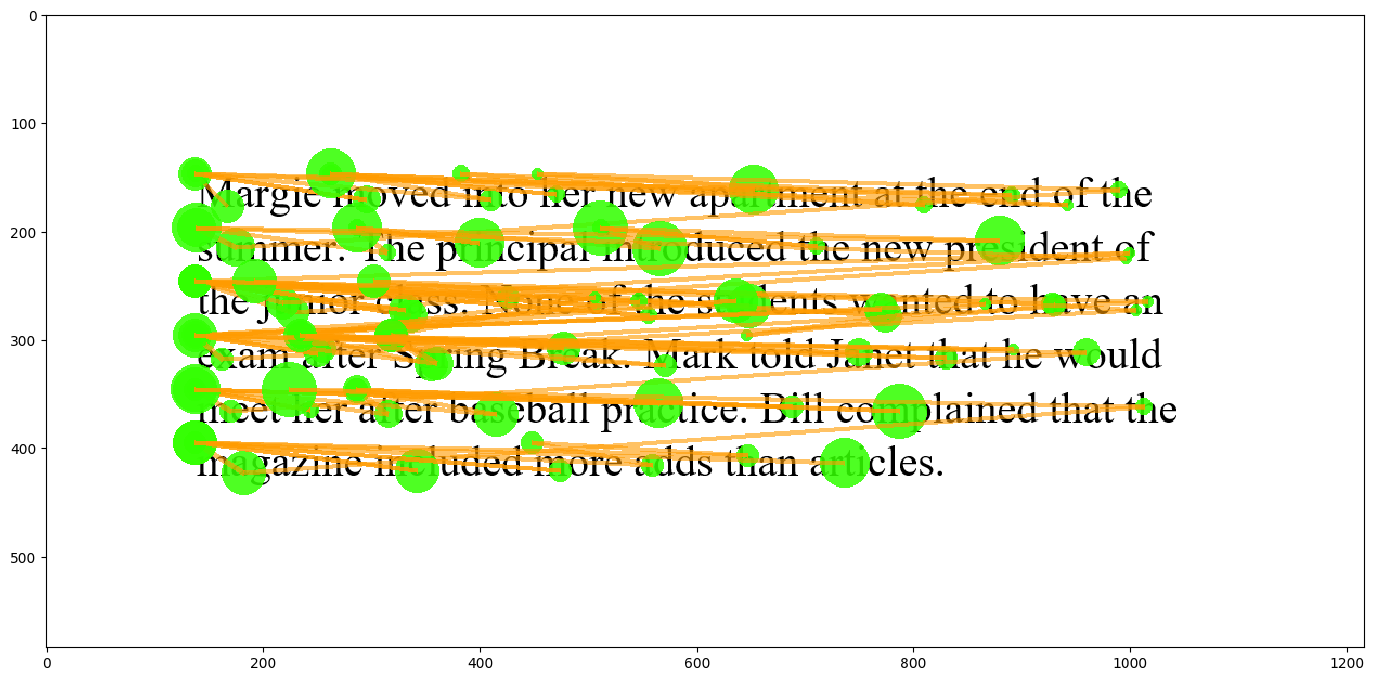

In [26]:
# generate within-line regression over the correct trial
image_path = "./"
image = "synthetic_text.png"

aoi_words = EMTK.find_aoi(image, image_path, level="sub-line")
aoi_lines = EMTK.find_aoi(image, image_path, level="line")

# Creating a sample lsit to store an array of an array of words where each index represents a line
words_sorted_by_line = []

for i in range(len(aoi_lines)):
    words_sorted_by_line.append([])

# Looping through the words and appending them to the correct line
for i in range(len(aoi_words)):
    word_line_number = int(aoi_words.at[i, 'name'].strip().split(' ')[1])
    # Appending the x and y coordinates of the word to the correct line
    words_sorted_by_line[word_line_number-1].append([aoi_words.at[i, 'x'], aoi_words.at[i, 'y']])

error_test, data['robot1'] = correction.error_within_line_regression(1, data['robot1'], words_sorted_by_line, aoi_lines)

# Printing the length of robot1 and error_test to check if the length of the two lists are the same
print(len(data['robot1']))
print(len(error_test))

# draw the trial with added error
correction.draw_fixation('synthetic_text.png', error_test)

0.5135135135135135
fixations:  111
match_list:  111


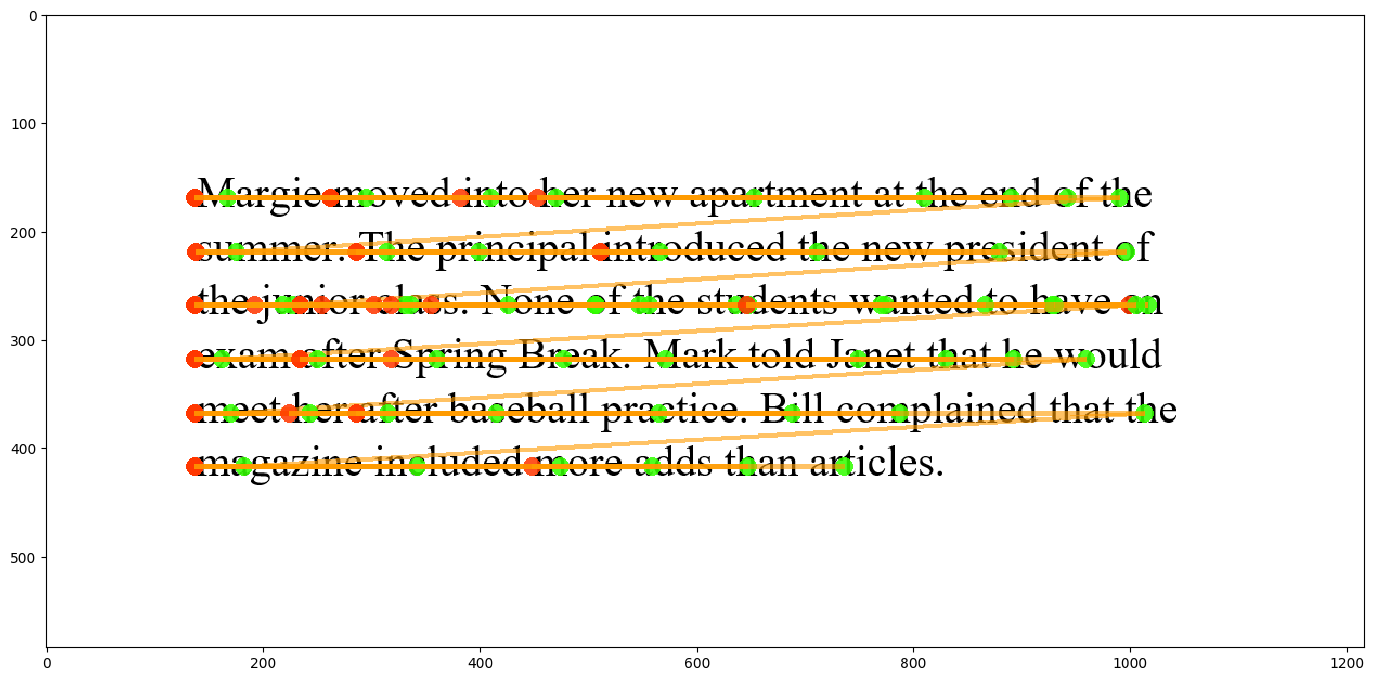

In [27]:

# find the center of each word, we need this for warp algorithm
word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

# warp correction
np_array = np.array(error_test.copy(), dtype=int)
durations = np.delete(np_array, 0, 1)
durations = np.delete(durations, 0, 1)
np_array = np.delete(np_array, 2, 1)


# run warp
warp_correction = algo.warp(np_array, word_centers)

percentage, match_list = correction.correction_quality(aoi, data['robot1'].copy(), warp_correction)
print(percentage)

# this is a cool function that draws the correction in red if the algorithm made a mistake
correction.draw_correction('synthetic_text.png', warp_correction, match_list)

This concludes the example I wanted to show you of running an error generator, then correcting the data, then seeing how well the correction algorithm did.  You will need to repeat the same concept for a bunch of algorithms in the next section.

# Comparing algorithms with Within-line Regression error:

In [29]:
attach_results = [[],[],[],[],[],[],[],[],[],[],[]]
chain_results = [[],[],[],[],[],[],[],[],[],[],[]]
regress_results = [[],[],[],[],[],[],[],[],[],[],[]]
warp_results = [[],[],[],[],[],[],[],[],[],[],[]]
# Initializing the remaining 6 algorithms
cluster_results = [[],[],[],[],[],[],[],[],[],[],[]]
compare_results = [[],[],[],[],[],[],[],[],[],[],[]]
merge_results = [[],[],[],[],[],[],[],[],[],[],[]]
segment_results = [[],[],[],[],[],[],[],[],[],[],[]]
split_results = [[],[],[],[],[],[],[],[],[],[],[]]
stretch_results = [[],[],[],[],[],[],[],[],[],[],[]]

import json

file = open('synthetic_dataset_with_time.txt', 'r')
text = file.read()
data = json.loads(text)

word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

duration_word_centers = correction.find_word_centers_and_duration(aois_with_tokens)
duration_word_centers = np.array(duration_word_centers.copy(), dtype=int)

image_path = "./"
image = "synthetic_text.png"
aoi_words = EMTK.find_aoi(image, image_path, level="sub-line")
aoi_lines = EMTK.find_aoi(image, image_path, level="line")

# Creating a sample lsit to store an array of an array of words where each index represents a line
words_sorted_by_line = []

for i in range(len(aoi_lines)):
    words_sorted_by_line.append([])

# Looping through the words and appending them to the correct line
for i in range(len(aoi_words)):
    word_line_number = int(aoi_words.at[i, 'name'].strip().split(' ')[1])
    # Appending the x and y coordinates of the word to the correct line
    words_sorted_by_line[word_line_number-1].append([aoi_words.at[i, 'x'], aoi_words.at[i, 'y']])

# MAKE SURE YOU RUN THIS 100 TIMES, NOT JUST ONE!!!
for robot_index in tqdm(range(100)):

    data_copy = data['robot' + str(robot_index)].copy()

    for error_probability in range(0, 11):

        data['robot' + str(robot_index)] = data_copy.copy()

        # generate within line regression error
        error_test, data['robot' + str(robot_index)] = correction.error_within_line_regression(error_probability/10, data['robot' + str(robot_index)].copy(), words_sorted_by_line, aoi_lines)
    
        # attach correction - 1
        np_array = np.array(error_test.copy())
        attach_correction = algo.attach(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), attach_correction)
        attach_results[error_probability].append(percentage)

        # chain correction - 2
        np_array = np.array(error_test.copy())
        chain_correction = algo.chain(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), chain_correction)
        chain_results[error_probability].append(percentage)
        
        # regress correction - 3
        np_array = np.array(error_test.copy())
        regress_correction = algo.regress(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), regress_correction)
        regress_results[error_probability].append(percentage)
        
        # warp correction - 4
        np_array = np.array(error_test.copy(), dtype=int)
        durations = np.delete(np_array, 0, 1)
        durations = np.delete(durations, 0, 1)
        np_array = np.delete(np_array, 2, 1)
        
        warp_correction = algo.warp(np_array, word_centers)        
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), warp_correction)
        warp_results[error_probability].append(percentage)

        if percentage < 1:
            # correction.draw_correction('synthetic_text.png', warp_correction, match_list)
            print("robot:", robot_index, "    error probability:", error_probability)

        # cluster correction - 5
        np_array = np.array(error_test.copy())
        cluster_correction = algo.cluster(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), cluster_correction)
        cluster_results[error_probability].append(percentage)

        # compare correction - 6 which takes in fixation_XY, word_XY
        np_array = np.array(error_test.copy())
        compare_correction = algo.compare(np_array, duration_word_centers)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), compare_correction)
        compare_results[error_probability].append(percentage)

        # merge correction - 7
        np_array = np.array(error_test.copy())
        merge_correction = algo.merge(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), merge_correction)
        merge_results[error_probability].append(percentage)

        # segment correction - 8
        np_array = np.array(error_test.copy())
        segment_correction = algo.segment(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), segment_correction)
        segment_results[error_probability].append(percentage)

        # split correction - 9
        np_array = np.array(error_test.copy())
        split_correction = algo.split(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), split_correction)
        split_results[error_probability].append(percentage)

        # stretch correction - 10
        np_array = np.array(error_test.copy())
        stretch_correction = algo.stretch(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), stretch_correction)
        stretch_results[error_probability].append(percentage)

/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colb

robot: 0     error probability: 0
robot: 0     error probability: 1
robot: 0     error probability: 2
robot: 0     error probability: 3
robot: 0     error probability: 4
robot: 0     error probability: 5
robot: 0     error probability: 6
robot: 0     error probability: 7
robot: 0     error probability: 8
robot: 0     error probability: 9
robot: 0     error probability: 10


  1%|          | 1/100 [00:13<22:13, 13.47s/it]

robot: 1     error probability: 0
robot: 1     error probability: 1
robot: 1     error probability: 2
robot: 1     error probability: 3
robot: 1     error probability: 4
robot: 1     error probability: 5
robot: 1     error probability: 6
robot: 1     error probability: 7
robot: 1     error probability: 8
robot: 1     error probability: 9
robot: 1     error probability: 10


  2%|▏         | 2/100 [00:27<22:57, 14.06s/it]

robot: 2     error probability: 1
robot: 2     error probability: 2
robot: 2     error probability: 3
robot: 2     error probability: 4
robot: 2     error probability: 5
robot: 2     error probability: 6
robot: 2     error probability: 7
robot: 2     error probability: 8
robot: 2     error probability: 9
robot: 2     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 3     error probability: 0
robot: 3     error probability: 1
robot: 3     error probability: 2
robot: 3     error probability: 3
robot: 3     error probability: 4
robot: 3     error probability: 5
robot: 3     error probability: 6
robot: 3     error probability: 7
robot: 3     error probability: 8
robot: 3     error probability: 9
robot: 3     error probability: 10


  4%|▍         | 4/100 [01:00<25:51, 16.16s/it]

robot: 4     error probability: 0
robot: 4     error probability: 1
robot: 4     error probability: 2
robot: 4     error probability: 3
robot: 4     error probability: 4
robot: 4     error probability: 5
robot: 4     error probability: 6
robot: 4     error probability: 7
robot: 4     error probability: 8
robot: 4     error probability: 9
robot: 4     error probability: 10


  5%|▌         | 5/100 [01:19<26:57, 17.02s/it]

robot: 5     error probability: 1
robot: 5     error probability: 2
robot: 5     error probability: 3
robot: 5     error probability: 4
robot: 5     error probability: 5
robot: 5     error probability: 6
robot: 5     error probability: 7
robot: 5     error probability: 8
robot: 5     error probability: 9
robot: 5     error probability: 10


  6%|▌         | 6/100 [01:31<24:06, 15.39s/it]

robot: 6     error probability: 0
robot: 6     error probability: 1
robot: 6     error probability: 2
robot: 6     error probability: 3
robot: 6     error probability: 4
robot: 6     error probability: 5
robot: 6     error probability: 6
robot: 6     error probability: 7
robot: 6     error probability: 8
robot: 6     error probability: 9
robot: 6     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
  7%|▋         | 7/100 [01:47<24:01, 15.50s/it]

robot: 7     error probability: 1
robot: 7     error probability: 2
robot: 7     error probability: 3
robot: 7     error probability: 4
robot: 7     error probability: 5
robot: 7     error probability: 6
robot: 7     error probability: 7
robot: 7     error probability: 8
robot: 7     error probability: 9
robot: 7     error probability: 10


  8%|▊         | 8/100 [01:59<22:06, 14.42s/it]

robot: 8     error probability: 0
robot: 8     error probability: 1
robot: 8     error probability: 2
robot: 8     error probability: 3
robot: 8     error probability: 4
robot: 8     error probability: 5
robot: 8     error probability: 6
robot: 8     error probability: 7
robot: 8     error probability: 8
robot: 8     error probability: 9
robot: 8     error probability: 10


  9%|▉         | 9/100 [02:12<21:24, 14.11s/it]

robot: 9     error probability: 0
robot: 9     error probability: 1
robot: 9     error probability: 2
robot: 9     error probability: 3
robot: 9     error probability: 4
robot: 9     error probability: 5
robot: 9     error probability: 6
robot: 9     error probability: 7
robot: 9     error probability: 8
robot: 9     error probability: 9
robot: 9     error probability: 10


 10%|█         | 10/100 [02:31<23:28, 15.65s/it]

robot: 10     error probability: 1
robot: 10     error probability: 2
robot: 10     error probability: 3
robot: 10     error probability: 4
robot: 10     error probability: 5
robot: 10     error probability: 6
robot: 10     error probability: 7
robot: 10     error probability: 8
robot: 10     error probability: 9
robot: 10     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 11     error probability: 0
robot: 11     error probability: 1
robot: 11     error probability: 2
robot: 11     error probability: 3
robot: 11     error probability: 4
robot: 11     error probability: 5
robot: 11     error probability: 6
robot: 11     error probability: 7
robot: 11     error probability: 8
robot: 11     error probability: 9
robot: 11     error probability: 10


 12%|█▏        | 12/100 [03:00<22:00, 15.01s/it]

robot: 12     error probability: 0
robot: 12     error probability: 1
robot: 12     error probability: 2
robot: 12     error probability: 3
robot: 12     error probability: 4
robot: 12     error probability: 5
robot: 12     error probability: 6
robot: 12     error probability: 7
robot: 12     error probability: 8
robot: 12     error probability: 9


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 12     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 13     error probability: 1
robot: 13     error probability: 2
robot: 13     error probability: 3
robot: 13     error probability: 4
robot: 13     error probability: 5
robot: 13     error probability: 6
robot: 13     error probability: 7
robot: 13     error probability: 8
robot: 13     error probability: 9
robot: 13     error probability: 10


 14%|█▍        | 14/100 [03:48<27:20, 19.07s/it]

robot: 14     error probability: 0
robot: 14     error probability: 1
robot: 14     error probability: 2
robot: 14     error probability: 3
robot: 14     error probability: 4
robot: 14     error probability: 5
robot: 14     error probability: 6
robot: 14     error probability: 7
robot: 14     error probability: 8
robot: 14     error probability: 9
robot: 14     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 15%|█▌        | 15/100 [04:05<26:10, 18.48s/it]

robot: 15     error probability: 1
robot: 15     error probability: 2
robot: 15     error probability: 3
robot: 15     error probability: 4
robot: 15     error probability: 5
robot: 15     error probability: 6
robot: 15     error probability: 7
robot: 15     error probability: 8
robot: 15     error probability: 9
robot: 15     error probability: 10


 16%|█▌        | 16/100 [04:17<23:14, 16.60s/it]

robot: 16     error probability: 0
robot: 16     error probability: 1
robot: 16     error probability: 2
robot: 16     error probability: 3
robot: 16     error probability: 4
robot: 16     error probability: 5
robot: 16     error probability: 6
robot: 16     error probability: 7
robot: 16     error probability: 8
robot: 16     error probability: 9
robot: 16     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 17     error probability: 1
robot: 17     error probability: 2
robot: 17     error probability: 3
robot: 17     error probability: 4
robot: 17     error probability: 5
robot: 17     error probability: 6
robot: 17     error probability: 7
robot: 17     error probability: 8
robot: 17     error probability: 9
robot: 17     error probability: 10


 18%|█▊        | 18/100 [04:52<23:30, 17.20s/it]

robot: 18     error probability: 1
robot: 18     error probability: 2
robot: 18     error probability: 3
robot: 18     error probability: 4
robot: 18     error probability: 5
robot: 18     error probability: 6
robot: 18     error probability: 7
robot: 18     error probability: 8
robot: 18     error probability: 9
robot: 18     error probability: 10


 19%|█▉        | 19/100 [05:08<22:26, 16.63s/it]

robot: 19     error probability: 0
robot: 19     error probability: 1
robot: 19     error probability: 2
robot: 19     error probability: 3
robot: 19     error probability: 4
robot: 19     error probability: 5
robot: 19     error probability: 6
robot: 19     error probability: 7
robot: 19     error probability: 8
robot: 19     error probability: 9
robot: 19     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 20%|██        | 20/100 [05:26<22:50, 17.13s/it]

robot: 20     error probability: 0
robot: 20     error probability: 1
robot: 20     error probability: 2
robot: 20     error probability: 3
robot: 20     error probability: 4
robot: 20     error probability: 5
robot: 20     error probability: 6
robot: 20     error probability: 7
robot: 20     error probability: 8
robot: 20     error probability: 9
robot: 20     error probability: 10


 21%|██        | 21/100 [05:43<22:32, 17.12s/it]

robot: 21     error probability: 1
robot: 21     error probability: 2
robot: 21     error probability: 3
robot: 21     error probability: 4
robot: 21     error probability: 5
robot: 21     error probability: 6
robot: 21     error probability: 7
robot: 21     error probability: 8
robot: 21     error probability: 9
robot: 21     error probability: 10


 22%|██▏       | 22/100 [05:57<21:02, 16.19s/it]

robot: 22     error probability: 0
robot: 22     error probability: 1
robot: 22     error probability: 2
robot: 22     error probability: 3
robot: 22     error probability: 4
robot: 22     error probability: 5
robot: 22     error probability: 6
robot: 22     error probability: 7
robot: 22     error probability: 8
robot: 22     error probability: 9
robot: 22     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 23     error probability: 0
robot: 23     error probability: 1
robot: 23     error probability: 2
robot: 23     error probability: 3
robot: 23     error probability: 4
robot: 23     error probability: 5
robot: 23     error probability: 6
robot: 23     error probability: 7
robot: 23     error probability: 8
robot: 23     error probability: 9
robot: 23     error probability: 10


 24%|██▍       | 24/100 [06:34<21:48, 17.21s/it]

robot: 24     error probability: 1
robot: 24     error probability: 2
robot: 24     error probability: 3
robot: 24     error probability: 4
robot: 24     error probability: 5
robot: 24     error probability: 6
robot: 24     error probability: 7
robot: 24     error probability: 8
robot: 24     error probability: 9
robot: 24     error probability: 10


 25%|██▌       | 25/100 [06:46<19:32, 15.63s/it]

robot: 25     error probability: 1
robot: 25     error probability: 2
robot: 25     error probability: 3
robot: 25     error probability: 4
robot: 25     error probability: 5
robot: 25     error probability: 6
robot: 25     error probability: 7
robot: 25     error probability: 8
robot: 25     error probability: 9
robot: 25     error probability: 10


 26%|██▌       | 26/100 [07:00<18:29, 15.00s/it]

robot: 26     error probability: 1
robot: 26     error probability: 2
robot: 26     error probability: 3
robot: 26     error probability: 4
robot: 26     error probability: 5
robot: 26     error probability: 6
robot: 26     error probability: 7
robot: 26     error probability: 8
robot: 26     error probability: 9
robot: 26     error probability: 10


 27%|██▋       | 27/100 [07:14<17:53, 14.71s/it]

robot: 27     error probability: 0
robot: 27     error probability: 1
robot: 27     error probability: 2
robot: 27     error probability: 3
robot: 27     error probability: 4
robot: 27     error probability: 5
robot: 27     error probability: 6
robot: 27     error probability: 7
robot: 27     error probability: 8
robot: 27     error probability: 9
robot: 27     error probability: 10


 28%|██▊       | 28/100 [07:31<18:39, 15.55s/it]

robot: 28     error probability: 0
robot: 28     error probability: 1
robot: 28     error probability: 2
robot: 28     error probability: 3
robot: 28     error probability: 4
robot: 28     error probability: 5
robot: 28     error probability: 6
robot: 28     error probability: 7
robot: 28     error probability: 8
robot: 28     error probability: 9


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)


robot: 28     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 29%|██▉       | 29/100 [07:47<18:25, 15.58s/it]

robot: 29     error probability: 1
robot: 29     error probability: 2
robot: 29     error probability: 3
robot: 29     error probability: 4
robot: 29     error probability: 5
robot: 29     error probability: 6
robot: 29     error probability: 7
robot: 29     error probability: 8
robot: 29     error probability: 9
robot: 29     error probability: 10


 30%|███       | 30/100 [08:01<17:45, 15.22s/it]

robot: 30     error probability: 1
robot: 30     error probability: 2
robot: 30     error probability: 3
robot: 30     error probability: 4
robot: 30     error probability: 5
robot: 30     error probability: 6
robot: 30     error probability: 7
robot: 30     error probability: 8
robot: 30     error probability: 9
robot: 30     error probability: 10


 31%|███       | 31/100 [08:14<16:46, 14.58s/it]

robot: 31     error probability: 1
robot: 31     error probability: 2
robot: 31     error probability: 3
robot: 31     error probability: 4
robot: 31     error probability: 5
robot: 31     error probability: 6
robot: 31     error probability: 7
robot: 31     error probability: 8
robot: 31     error probability: 9
robot: 31     error probability: 10


 32%|███▏      | 32/100 [08:27<15:57, 14.08s/it]

robot: 32     error probability: 0
robot: 32     error probability: 1
robot: 32     error probability: 2
robot: 32     error probability: 3
robot: 32     error probability: 4
robot: 32     error probability: 5
robot: 32     error probability: 6
robot: 32     error probability: 7
robot: 32     error probability: 8
robot: 32     error probability: 9
robot: 32     error probability: 10


 33%|███▎      | 33/100 [08:44<16:29, 14.76s/it]

robot: 33     error probability: 1
robot: 33     error probability: 2
robot: 33     error probability: 3
robot: 33     error probability: 4
robot: 33     error probability: 5
robot: 33     error probability: 6
robot: 33     error probability: 7
robot: 33     error probability: 8
robot: 33     error probability: 9
robot: 33     error probability: 10


 34%|███▍      | 34/100 [08:57<15:47, 14.36s/it]

robot: 34     error probability: 1
robot: 34     error probability: 2
robot: 34     error probability: 3
robot: 34     error probability: 4
robot: 34     error probability: 5
robot: 34     error probability: 6
robot: 34     error probability: 7
robot: 34     error probability: 8
robot: 34     error probability: 9
robot: 34     error probability: 10


 35%|███▌      | 35/100 [09:17<17:14, 15.92s/it]

robot: 35     error probability: 1
robot: 35     error probability: 2
robot: 35     error probability: 3
robot: 35     error probability: 4
robot: 35     error probability: 5
robot: 35     error probability: 6
robot: 35     error probability: 7
robot: 35     error probability: 8
robot: 35     error probability: 9
robot: 35     error probability: 10


 36%|███▌      | 36/100 [09:32<16:43, 15.68s/it]

robot: 36     error probability: 1
robot: 36     error probability: 2
robot: 36     error probability: 3
robot: 36     error probability: 4
robot: 36     error probability: 5
robot: 36     error probability: 6
robot: 36     error probability: 7
robot: 36     error probability: 8
robot: 36     error probability: 9
robot: 36     error probability: 10


 37%|███▋      | 37/100 [09:45<15:42, 14.96s/it]

robot: 37     error probability: 0
robot: 37     error probability: 1
robot: 37     error probability: 2
robot: 37     error probability: 3
robot: 37     error probability: 4
robot: 37     error probability: 5
robot: 37     error probability: 6
robot: 37     error probability: 7
robot: 37     error probability: 8
robot: 37     error probability: 9
robot: 37     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 38%|███▊      | 38/100 [10:02<15:57, 15.45s/it]

robot: 38     error probability: 0
robot: 38     error probability: 1
robot: 38     error probability: 2
robot: 38     error probability: 3
robot: 38     error probability: 4
robot: 38     error probability: 5
robot: 38     error probability: 6
robot: 38     error probability: 7
robot: 38     error probability: 8
robot: 38     error probability: 9
robot: 38     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 39     error probability: 0
robot: 39     error probability: 1
robot: 39     error probability: 2
robot: 39     error probability: 3
robot: 39     error probability: 4
robot: 39     error probability: 5
robot: 39     error probability: 6
robot: 39     error probability: 7
robot: 39     error probability: 8
robot: 39     error probability: 9
robot: 39     error probability: 10


 40%|████      | 40/100 [10:36<16:21, 16.35s/it]

robot: 40     error probability: 0
robot: 40     error probability: 1
robot: 40     error probability: 2
robot: 40     error probability: 3
robot: 40     error probability: 4
robot: 40     error probability: 5
robot: 40     error probability: 6
robot: 40     error probability: 7
robot: 40     error probability: 8
robot: 40     error probability: 9


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 40     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 41%|████      | 41/100 [10:57<17:28, 17.77s/it]

robot: 41     error probability: 0
robot: 41     error probability: 1
robot: 41     error probability: 2
robot: 41     error probability: 3
robot: 41     error probability: 4
robot: 41     error probability: 5
robot: 41     error probability: 6
robot: 41     error probability: 7
robot: 41     error probability: 8
robot: 41     error probability: 9
robot: 41     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 42%|████▏     | 42/100 [11:16<17:17, 17.89s/it]

robot: 42     error probability: 0
robot: 42     error probability: 1
robot: 42     error probability: 2
robot: 42     error probability: 3
robot: 42     error probability: 4
robot: 42     error probability: 5
robot: 42     error probability: 6
robot: 42     error probability: 7
robot: 42     error probability: 8
robot: 42     error probability: 9
robot: 42     error probability: 10


 43%|████▎     | 43/100 [11:32<16:27, 17.33s/it]

robot: 43     error probability: 0
robot: 43     error probability: 1
robot: 43     error probability: 2
robot: 43     error probability: 3
robot: 43     error probability: 4
robot: 43     error probability: 5
robot: 43     error probability: 6
robot: 43     error probability: 7
robot: 43     error probability: 8
robot: 43     error probability: 9
robot: 43     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 44     error probability: 1
robot: 44     error probability: 2
robot: 44     error probability: 3
robot: 44     error probability: 4
robot: 44     error probability: 5
robot: 44     error probability: 6
robot: 44     error probability: 7
robot: 44     error probability: 8
robot: 44     error probability: 9
robot: 44     error probability: 10


 45%|████▌     | 45/100 [12:02<14:37, 15.96s/it]

robot: 45     error probability: 1
robot: 45     error probability: 2
robot: 45     error probability: 3
robot: 45     error probability: 4
robot: 45     error probability: 5
robot: 45     error probability: 6
robot: 45     error probability: 7
robot: 45     error probability: 8
robot: 45     error probability: 9
robot: 45     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 46%|████▌     | 46/100 [12:17<14:07, 15.69s/it]

robot: 46     error probability: 0
robot: 46     error probability: 1
robot: 46     error probability: 2
robot: 46     error probability: 3
robot: 46     error probability: 4
robot: 46     error probability: 5
robot: 46     error probability: 6
robot: 46     error probability: 7
robot: 46     error probability: 8
robot: 46     error probability: 9
robot: 46     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 47     error probability: 1
robot: 47     error probability: 2
robot: 47     error probability: 3
robot: 47     error probability: 4
robot: 47     error probability: 5
robot: 47     error probability: 6
robot: 47     error probability: 7
robot: 47     error probability: 8
robot: 47     error probability: 9
robot: 47     error probability: 10


 48%|████▊     | 48/100 [12:48<13:40, 15.77s/it]

robot: 48     error probability: 0
robot: 48     error probability: 1
robot: 48     error probability: 2
robot: 48     error probability: 3
robot: 48     error probability: 4
robot: 48     error probability: 5
robot: 48     error probability: 6
robot: 48     error probability: 7
robot: 48     error probability: 8
robot: 48     error probability: 9
robot: 48     error probability: 10


 49%|████▉     | 49/100 [13:03<13:12, 15.54s/it]

robot: 49     error probability: 1
robot: 49     error probability: 2
robot: 49     error probability: 3
robot: 49     error probability: 4
robot: 49     error probability: 5
robot: 49     error probability: 6
robot: 49     error probability: 7
robot: 49     error probability: 8
robot: 49     error probability: 9
robot: 49     error probability: 10


 50%|█████     | 50/100 [13:15<11:58, 14.38s/it]

robot: 50     error probability: 1
robot: 50     error probability: 2
robot: 50     error probability: 3
robot: 50     error probability: 4
robot: 50     error probability: 5
robot: 50     error probability: 6
robot: 50     error probability: 7
robot: 50     error probability: 8
robot: 50     error probability: 9
robot: 50     error probability: 10


 51%|█████     | 51/100 [13:28<11:27, 14.03s/it]

robot: 51     error probability: 0
robot: 51     error probability: 1
robot: 51     error probability: 2
robot: 51     error probability: 3
robot: 51     error probability: 4
robot: 51     error probability: 5
robot: 51     error probability: 6
robot: 51     error probability: 7
robot: 51     error probability: 8
robot: 51     error probability: 9
robot: 51     error probability: 10


 52%|█████▏    | 52/100 [13:43<11:26, 14.29s/it]

robot: 52     error probability: 1
robot: 52     error probability: 2
robot: 52     error probability: 3
robot: 52     error probability: 4
robot: 52     error probability: 5
robot: 52     error probability: 6
robot: 52     error probability: 7
robot: 52     error probability: 8
robot: 52     error probability: 9
robot: 52     error probability: 10


 53%|█████▎    | 53/100 [13:57<11:02, 14.09s/it]

robot: 53     error probability: 0
robot: 53     error probability: 1
robot: 53     error probability: 2
robot: 53     error probability: 3
robot: 53     error probability: 4
robot: 53     error probability: 5
robot: 53     error probability: 6
robot: 53     error probability: 7
robot: 53     error probability: 8
robot: 53     error probability: 9
robot: 53     error probability: 10


 54%|█████▍    | 54/100 [14:13<11:21, 14.82s/it]

robot: 54     error probability: 1
robot: 54     error probability: 2
robot: 54     error probability: 3
robot: 54     error probability: 4
robot: 54     error probability: 5
robot: 54     error probability: 6
robot: 54     error probability: 7
robot: 54     error probability: 8
robot: 54     error probability: 9
robot: 54     error probability: 10


 55%|█████▌    | 55/100 [14:28<11:10, 14.90s/it]

robot: 55     error probability: 1
robot: 55     error probability: 2
robot: 55     error probability: 3
robot: 55     error probability: 4
robot: 55     error probability: 5
robot: 55     error probability: 6
robot: 55     error probability: 7
robot: 55     error probability: 8
robot: 55     error probability: 9
robot: 55     error probability: 10


 56%|█████▌    | 56/100 [14:42<10:40, 14.55s/it]

robot: 56     error probability: 0
robot: 56     error probability: 1
robot: 56     error probability: 2
robot: 56     error probability: 3
robot: 56     error probability: 4
robot: 56     error probability: 5
robot: 56     error probability: 6
robot: 56     error probability: 7
robot: 56     error probability: 8
robot: 56     error probability: 9
robot: 56     error probability: 10


 57%|█████▋    | 57/100 [14:57<10:25, 14.55s/it]

robot: 57     error probability: 1
robot: 57     error probability: 2
robot: 57     error probability: 3
robot: 57     error probability: 4
robot: 57     error probability: 5
robot: 57     error probability: 6
robot: 57     error probability: 7
robot: 57     error probability: 8
robot: 57     error probability: 9
robot: 57     error probability: 10


 58%|█████▊    | 58/100 [15:09<09:45, 13.93s/it]

robot: 58     error probability: 0
robot: 58     error probability: 1
robot: 58     error probability: 2
robot: 58     error probability: 3
robot: 58     error probability: 4
robot: 58     error probability: 5
robot: 58     error probability: 6
robot: 58     error probability: 7
robot: 58     error probability: 8
robot: 58     error probability: 9
robot: 58     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 59%|█████▉    | 59/100 [15:27<10:19, 15.11s/it]

robot: 59     error probability: 0
robot: 59     error probability: 1
robot: 59     error probability: 2
robot: 59     error probability: 3
robot: 59     error probability: 4
robot: 59     error probability: 5
robot: 59     error probability: 6
robot: 59     error probability: 7
robot: 59     error probability: 8
robot: 59     error probability: 9
robot: 59     error probability: 10


 60%|██████    | 60/100 [15:43<10:12, 15.30s/it]

robot: 60     error probability: 1
robot: 60     error probability: 2
robot: 60     error probability: 3
robot: 60     error probability: 4
robot: 60     error probability: 5
robot: 60     error probability: 6
robot: 60     error probability: 7
robot: 60     error probability: 8
robot: 60     error probability: 9
robot: 60     error probability: 10


 61%|██████    | 61/100 [15:57<09:51, 15.17s/it]

robot: 61     error probability: 0
robot: 61     error probability: 1
robot: 61     error probability: 2
robot: 61     error probability: 3
robot: 61     error probability: 4
robot: 61     error probability: 5
robot: 61     error probability: 6
robot: 61     error probability: 7
robot: 61     error probability: 8
robot: 61     error probability: 9
robot: 61     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 62%|██████▏   | 62/100 [16:20<10:55, 17.26s/it]

robot: 62     error probability: 0
robot: 62     error probability: 1
robot: 62     error probability: 2
robot: 62     error probability: 3
robot: 62     error probability: 4
robot: 62     error probability: 5
robot: 62     error probability: 6
robot: 62     error probability: 7


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)


robot: 62     error probability: 8
robot: 62     error probability: 9
robot: 62     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 63     error probability: 0
robot: 63     error probability: 1
robot: 63     error probability: 2
robot: 63     error probability: 3
robot: 63     error probability: 4
robot: 63     error probability: 5
robot: 63     error probability: 6
robot: 63     error probability: 7
robot: 63     error probability: 8
robot: 63     error probability: 9
robot: 63     error probability: 10


 64%|██████▍   | 64/100 [16:56<10:32, 17.58s/it]

robot: 64     error probability: 0
robot: 64     error probability: 1
robot: 64     error probability: 2
robot: 64     error probability: 3
robot: 64     error probability: 4
robot: 64     error probability: 5
robot: 64     error probability: 6
robot: 64     error probability: 7
robot: 64     error probability: 8
robot: 64     error probability: 9
robot: 64     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 65     error probability: 1
robot: 65     error probability: 2
robot: 65     error probability: 3
robot: 65     error probability: 4
robot: 65     error probability: 5
robot: 65     error probability: 6
robot: 65     error probability: 7
robot: 65     error probability: 8
robot: 65     error probability: 9
robot: 65     error probability: 10


 66%|██████▌   | 66/100 [17:26<09:09, 16.16s/it]

robot: 66     error probability: 1
robot: 66     error probability: 2
robot: 66     error probability: 3
robot: 66     error probability: 4
robot: 66     error probability: 5
robot: 66     error probability: 6
robot: 66     error probability: 7
robot: 66     error probability: 8
robot: 66     error probability: 9
robot: 66     error probability: 10


 67%|██████▋   | 67/100 [17:41<08:39, 15.74s/it]

robot: 67     error probability: 0
robot: 67     error probability: 1
robot: 67     error probability: 2
robot: 67     error probability: 3
robot: 67     error probability: 4
robot: 67     error probability: 5
robot: 67     error probability: 6
robot: 67     error probability: 7
robot: 67     error probability: 8
robot: 67     error probability: 9
robot: 67     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 68%|██████▊   | 68/100 [18:00<08:53, 16.67s/it]

robot: 68     error probability: 0
robot: 68     error probability: 1
robot: 68     error probability: 2
robot: 68     error probability: 3
robot: 68     error probability: 4
robot: 68     error probability: 5
robot: 68     error probability: 6
robot: 68     error probability: 7
robot: 68     error probability: 8
robot: 68     error probability: 9
robot: 68     error probability: 10


 69%|██████▉   | 69/100 [18:13<08:04, 15.62s/it]

robot: 69     error probability: 1
robot: 69     error probability: 2
robot: 69     error probability: 3
robot: 69     error probability: 4
robot: 69     error probability: 5
robot: 69     error probability: 6
robot: 69     error probability: 7
robot: 69     error probability: 8
robot: 69     error probability: 9


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 69     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 70     error probability: 1
robot: 70     error probability: 2
robot: 70     error probability: 3
robot: 70     error probability: 4
robot: 70     error probability: 5
robot: 70     error probability: 6
robot: 70     error probability: 7
robot: 70     error probability: 8
robot: 70     error probability: 9
robot: 70     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 71%|███████   | 71/100 [18:45<07:33, 15.64s/it]

robot: 71     error probability: 1
robot: 71     error probability: 2
robot: 71     error probability: 3
robot: 71     error probability: 4
robot: 71     error probability: 5
robot: 71     error probability: 6
robot: 71     error probability: 7
robot: 71     error probability: 8
robot: 71     error probability: 9
robot: 71     error probability: 10


 72%|███████▏  | 72/100 [19:00<07:13, 15.47s/it]

robot: 72     error probability: 1
robot: 72     error probability: 2
robot: 72     error probability: 3
robot: 72     error probability: 4
robot: 72     error probability: 5
robot: 72     error probability: 6
robot: 72     error probability: 7
robot: 72     error probability: 8
robot: 72     error probability: 9
robot: 72     error probability: 10


 73%|███████▎  | 73/100 [19:14<06:49, 15.15s/it]

robot: 73     error probability: 1
robot: 73     error probability: 2
robot: 73     error probability: 3
robot: 73     error probability: 4
robot: 73     error probability: 5
robot: 73     error probability: 6
robot: 73     error probability: 7
robot: 73     error probability: 8
robot: 73     error probability: 9
robot: 73     error probability: 10


 74%|███████▍  | 74/100 [19:28<06:24, 14.80s/it]

robot: 74     error probability: 0
robot: 74     error probability: 1
robot: 74     error probability: 2
robot: 74     error probability: 3
robot: 74     error probability: 4
robot: 74     error probability: 5
robot: 74     error probability: 6
robot: 74     error probability: 7
robot: 74     error probability: 8
robot: 74     error probability: 9
robot: 74     error probability: 10


 75%|███████▌  | 75/100 [19:42<06:06, 14.66s/it]

robot: 75     error probability: 0
robot: 75     error probability: 1
robot: 75     error probability: 2
robot: 75     error probability: 3
robot: 75     error probability: 4
robot: 75     error probability: 5
robot: 75     error probability: 6
robot: 75     error probability: 7
robot: 75     error probability: 8
robot: 75     error probability: 9
robot: 75     error probability: 10


 76%|███████▌  | 76/100 [19:58<05:57, 14.88s/it]

robot: 76     error probability: 1
robot: 76     error probability: 2
robot: 76     error probability: 3
robot: 76     error probability: 4
robot: 76     error probability: 5
robot: 76     error probability: 6
robot: 76     error probability: 7
robot: 76     error probability: 8
robot: 76     error probability: 9
robot: 76     error probability: 10


 77%|███████▋  | 77/100 [20:11<05:29, 14.34s/it]

robot: 77     error probability: 0
robot: 77     error probability: 1
robot: 77     error probability: 2
robot: 77     error probability: 3
robot: 77     error probability: 4
robot: 77     error probability: 5
robot: 77     error probability: 6
robot: 77     error probability: 7
robot: 77     error probability: 8
robot: 77     error probability: 9
robot: 77     error probability: 10


 78%|███████▊  | 78/100 [20:35<06:23, 17.43s/it]

robot: 78     error probability: 1
robot: 78     error probability: 2
robot: 78     error probability: 3
robot: 78     error probability: 4
robot: 78     error probability: 5
robot: 78     error probability: 6
robot: 78     error probability: 7
robot: 78     error probability: 8
robot: 78     error probability: 9
robot: 78     error probability: 10


 79%|███████▉  | 79/100 [20:50<05:47, 16.56s/it]

robot: 79     error probability: 0
robot: 79     error probability: 1
robot: 79     error probability: 2
robot: 79     error probability: 3
robot: 79     error probability: 4
robot: 79     error probability: 5
robot: 79     error probability: 6
robot: 79     error probability: 7
robot: 79     error probability: 8
robot: 79     error probability: 9
robot: 79     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 80     error probability: 0
robot: 80     error probability: 1
robot: 80     error probability: 2
robot: 80     error probability: 3
robot: 80     error probability: 4
robot: 80     error probability: 5
robot: 80     error probability: 6
robot: 80     error probability: 7
robot: 80     error probability: 8
robot: 80     error probability: 9
robot: 80     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 81     error probability: 0
robot: 81     error probability: 1
robot: 81     error probability: 2
robot: 81     error probability: 3
robot: 81     error probability: 4
robot: 81     error probability: 5
robot: 81     error probability: 6
robot: 81     error probability: 7
robot: 81     error probability: 8
robot: 81     error probability: 9
robot: 81     error probability: 10


 82%|████████▏ | 82/100 [21:50<05:34, 18.56s/it]

robot: 82     error probability: 1
robot: 82     error probability: 2
robot: 82     error probability: 3
robot: 82     error probability: 4
robot: 82     error probability: 5
robot: 82     error probability: 6
robot: 82     error probability: 7
robot: 82     error probability: 8
robot: 82     error probability: 9


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)


robot: 82     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 83%|████████▎ | 83/100 [22:05<05:00, 17.68s/it]

robot: 83     error probability: 0
robot: 83     error probability: 1
robot: 83     error probability: 2
robot: 83     error probability: 3
robot: 83     error probability: 4
robot: 83     error probability: 5
robot: 83     error probability: 6
robot: 83     error probability: 7
robot: 83     error probability: 8
robot: 83     error probability: 9
robot: 83     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 84%|████████▍ | 84/100 [22:22<04:36, 17.27s/it]

robot: 84     error probability: 0
robot: 84     error probability: 1
robot: 84     error probability: 2
robot: 84     error probability: 3
robot: 84     error probability: 4
robot: 84     error probability: 5
robot: 84     error probability: 6
robot: 84     error probability: 7
robot: 84     error probability: 8
robot: 84     error probability: 9
robot: 84     error probability: 10


 85%|████████▌ | 85/100 [22:38<04:15, 17.05s/it]

robot: 85     error probability: 0
robot: 85     error probability: 1
robot: 85     error probability: 2
robot: 85     error probability: 3
robot: 85     error probability: 4
robot: 85     error probability: 5
robot: 85     error probability: 6
robot: 85     error probability: 7
robot: 85     error probability: 8
robot: 85     error probability: 9
robot: 85     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 86     error probability: 0
robot: 86     error probability: 1
robot: 86     error probability: 2
robot: 86     error probability: 3
robot: 86     error probability: 4
robot: 86     error probability: 5
robot: 86     error probability: 6
robot: 86     error probability: 7
robot: 86     error probability: 8
robot: 86     error probability: 9
robot: 86     error probability: 10


 87%|████████▋ | 87/100 [23:14<03:46, 17.46s/it]

robot: 87     error probability: 1
robot: 87     error probability: 2
robot: 87     error probability: 3
robot: 87     error probability: 4
robot: 87     error probability: 5
robot: 87     error probability: 6
robot: 87     error probability: 7
robot: 87     error probability: 8
robot: 87     error probability: 9
robot: 87     error probability: 10


 88%|████████▊ | 88/100 [23:28<03:16, 16.34s/it]

robot: 88     error probability: 1
robot: 88     error probability: 2
robot: 88     error probability: 3
robot: 88     error probability: 4
robot: 88     error probability: 5
robot: 88     error probability: 6
robot: 88     error probability: 7
robot: 88     error probability: 8
robot: 88     error probability: 9
robot: 88     error probability: 10


 89%|████████▉ | 89/100 [23:41<02:49, 15.40s/it]

robot: 89     error probability: 0
robot: 89     error probability: 1
robot: 89     error probability: 2
robot: 89     error probability: 3
robot: 89     error probability: 4
robot: 89     error probability: 5
robot: 89     error probability: 6
robot: 89     error probability: 7
robot: 89     error probability: 8
robot: 89     error probability: 9
robot: 89     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 90     error probability: 1
robot: 90     error probability: 2
robot: 90     error probability: 3
robot: 90     error probability: 4
robot: 90     error probability: 5
robot: 90     error probability: 6
robot: 90     error probability: 7
robot: 90     error probability: 8
robot: 90     error probability: 9
robot: 90     error probability: 10


 91%|█████████ | 91/100 [24:27<02:49, 18.79s/it]

robot: 91     error probability: 1
robot: 91     error probability: 2
robot: 91     error probability: 3
robot: 91     error probability: 4
robot: 91     error probability: 5
robot: 91     error probability: 6
robot: 91     error probability: 7
robot: 91     error probability: 8
robot: 91     error probability: 9
robot: 91     error probability: 10


 92%|█████████▏| 92/100 [24:42<02:19, 17.42s/it]

robot: 92     error probability: 0
robot: 92     error probability: 1
robot: 92     error probability: 2
robot: 92     error probability: 3
robot: 92     error probability: 4
robot: 92     error probability: 5
robot: 92     error probability: 6
robot: 92     error probability: 7
robot: 92     error probability: 8
robot: 92     error probability: 9
robot: 92     error probability: 10


 93%|█████████▎| 93/100 [25:00<02:03, 17.62s/it]

robot: 93     error probability: 1
robot: 93     error probability: 2
robot: 93     error probability: 3
robot: 93     error probability: 4
robot: 93     error probability: 5
robot: 93     error probability: 6
robot: 93     error probability: 7
robot: 93     error probability: 8
robot: 93     error probability: 9
robot: 93     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 94     error probability: 0
robot: 94     error probability: 1
robot: 94     error probability: 2
robot: 94     error probability: 3
robot: 94     error probability: 4
robot: 94     error probability: 5
robot: 94     error probability: 6
robot: 94     error probability: 7
robot: 94     error probability: 8
robot: 94     error probability: 9
robot: 94     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 95%|█████████▌| 95/100 [25:35<01:29, 17.91s/it]

robot: 95     error probability: 1
robot: 95     error probability: 2
robot: 95     error probability: 3
robot: 95     error probability: 4
robot: 95     error probability: 5
robot: 95     error probability: 6
robot: 95     error probability: 7
robot: 95     error probability: 8
robot: 95     error probability: 9
robot: 95     error probability: 10


 96%|█████████▌| 96/100 [25:49<01:06, 16.62s/it]

robot: 96     error probability: 0
robot: 96     error probability: 1
robot: 96     error probability: 2
robot: 96     error probability: 3
robot: 96     error probability: 4
robot: 96     error probability: 5
robot: 96     error probability: 6
robot: 96     error probability: 7
robot: 96     error probability: 8
robot: 96     error probability: 9
robot: 96     error probability: 10


 97%|█████████▋| 97/100 [26:04<00:48, 16.26s/it]

robot: 97     error probability: 0
robot: 97     error probability: 1
robot: 97     error probability: 2
robot: 97     error probability: 3
robot: 97     error probability: 4
robot: 97     error probability: 5
robot: 97     error probability: 6
robot: 97     error probability: 7
robot: 97     error probability: 8
robot: 97     error probability: 9
robot: 97     error probability: 10


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_41055/342082079.py:100: RankWarning:

robot: 98     error probability: 1
robot: 98     error probability: 2
robot: 98     error probability: 3
robot: 98     error probability: 4
robot: 98     error probability: 5
robot: 98     error probability: 6
robot: 98     error probability: 7
robot: 98     error probability: 8
robot: 98     error probability: 9
robot: 98     error probability: 10


 99%|█████████▉| 99/100 [26:38<00:16, 16.54s/it]

robot: 99     error probability: 1
robot: 99     error probability: 2
robot: 99     error probability: 3
robot: 99     error probability: 4
robot: 99     error probability: 5
robot: 99     error probability: 6
robot: 99     error probability: 7
robot: 99     error probability: 8
robot: 99     error probability: 9
robot: 99     error probability: 10


100%|██████████| 100/100 [26:52<00:00, 16.12s/it]


In [30]:
import statistics

def mean_error_group(results):
    new_list = []
    
    for result in results:
        new_list.append(statistics.mean(result))
        
    return new_list

In [31]:
mean_attach_results = mean_error_group(attach_results)
mean_chain_results = mean_error_group(chain_results)
mean_regress_results = mean_error_group(regress_results)
mean_warp_results = mean_error_group(warp_results)
mean_cluster_results = mean_error_group(cluster_results)
mean_compare_results = mean_error_group(compare_results)
mean_merge_results = mean_error_group(merge_results)
mean_segment_results = mean_error_group(segment_results)
mean_split_results = mean_error_group(split_results)
mean_stretch_results = mean_error_group(stretch_results)

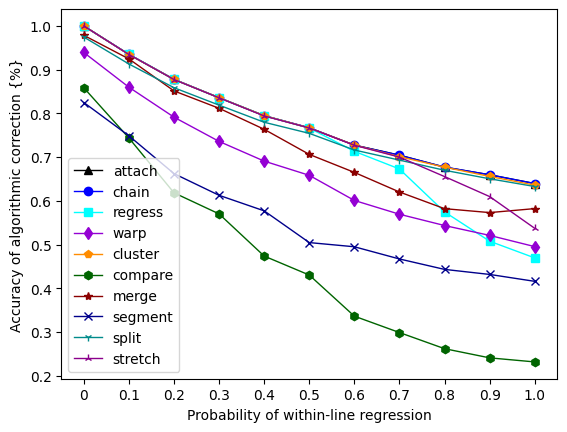

In [32]:
import matplotlib.pyplot as plt
plt.plot(mean_attach_results, color='Black', linewidth=1, marker='^')
plt.plot(mean_chain_results, color='Blue', linewidth=1, marker='o')
plt.plot(mean_regress_results, color='Aqua', linewidth=1, marker='s')
plt.plot(mean_warp_results, color='DarkViolet', linewidth=1, marker='d')
plt.plot(mean_cluster_results, color='DarkOrange', linewidth=1, marker='p')
plt.plot(mean_compare_results, color='DarkGreen', linewidth=1, marker='h')
plt.plot(mean_merge_results, color='DarkRed', linewidth=1, marker='*')
plt.plot(mean_segment_results, color='DarkBlue', linewidth=1, marker='x')
plt.plot(mean_split_results, color='DarkCyan', linewidth=1, marker='1')
plt.plot(mean_stretch_results, color='DarkMagenta', linewidth=1, marker='2')

plt.legend(['attach', 'chain', 'regress', 'warp', 'cluster', 'compare', 'merge', 'segment', 'split', 'stretch'])
plt.ylabel('Accuracy of algorithmic correction {%}')
plt.xlabel('Probability of within-line regression')

x_ticks_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
plt.xticks(range(0, 11), x_ticks_labels)
#plt.savefig("noise_comparison.png")
plt.show()

In [34]:
print("mean attach:", statistics.mean(mean_attach_results))
print("mean chain:", statistics.mean(mean_chain_results))
print("mean regress:", statistics.mean(mean_regress_results))
print("mean warp:", statistics.mean(mean_warp_results))
print("mean cluster:", statistics.mean(mean_cluster_results))
print("mean compare:", statistics.mean(mean_compare_results))
print("mean merge:", statistics.mean(mean_merge_results))
print("mean segment:", statistics.mean(mean_segment_results))
print("mean split:", statistics.mean(mean_split_results))
print("mean stretch:", statistics.mean(mean_stretch_results))

mean attach: 0.7834291250841579
mean chain: 0.7834408765975318
mean regress: 0.7406338775509023
mean warp: 0.6731576728365598
mean cluster: 0.7823786888072402
mean compare: 0.46026075958993545
mean merge: 0.7325357470686276
mean segment: 0.5619889567773123
mean split: 0.769178963807446
mean stretch: 0.7670249442026618
